# Introduction

## Motivation
We wanted to look which neighborhood has the best quality of life in Allegheny County. Some neighborhoods in Pittsburgh do not have the best neighborhoods in terms of accessibility to certain facilities. We intend to explore which neighborhoods include conditions that have the best quality of living. We aim to measure the quality of the life through the metrics listed below. 


# Our Metrics
We chose three different measurements to identify the best neighborhood in Pittsburgh.
1. Walkability
2. Access to food
3. Park availability
<br>
<br>Each neighborhood would have a given score that represents the combined scores of all three metrics with the higher score representing the better neighborhood.

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

### Walkability

For walkability, we are looking at the ratio of sidewalks or pedestrian infrastructure to roads.
The dataset with the ratio only identifies areas by GEOIDs bassed on Census Tracts, so I found a secondary dataset that plots Census Tract GEOIDs to zipcodes and neighborhoods, combined them based on that metric, and then was able to show the walkability ratio of each neighborhood.

In [3]:
walk = pd.read_csv("sidewalkstreetratioupload.csv")
walk.head()

,GEOID,NAMELSAD,SidewalkStepLFt,StreetLFt,Ratio
0,420030103001,Block Group 1,13392.83310,30315.86390,0.441776
1,420030103002,Block Group 2,31944.47597,20586.79493,1.551697
2,420030103003,Block Group 3,18655.20798,12122.70024,1.538866
3,420030103004,Block Group 4,14456.19616,11567.62831,1.249711
4,420030201001,Block Group 1,43952.94811,24426.52459,1.799394


In [4]:
zcodes = pd.read_csv("9756af5f-3320-4601-84e2-347d64071e25.csv")
zcodes.head()

,objectid,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,aland10,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,shape_area,shape_length
0,1,42,3,40500,1,420030405001,Block Group 1,G5030,S,268195,...,7,40500,2,2775,2985,92.964824,92.96,Yes,5.079492e+06,10442.036450
1,2,42,3,40400,1,420030404001,Block Group 1,G5030,S,75472,...,6,40400,2,1365,2020,67.574257,67.57,Yes,2.105489e+06,6609.688123
2,3,42,3,40200,2,420030402002,Block Group 2,G5030,S,282679,...,5,40200,2,1070,1290,82.945736,82.94,Yes,5.998649e+06,18280.484081
3,4,42,3,30500,2,420030305002,Block Group 2,G5030,S,284548,...,4,30500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444
4,5,42,3,980000,1,420039800001,Block Group 1,G5030,S,637235,...,125,980000,1,65,220,29.545455,29.54,No,7.764866e+06,13581.875089


One problem is, one zipcode can contain multiple of these particular GEOIDs, so I need to merge them, find out which GEOIDs have the same zipcode, combine the ratios of the tracts that are in the same zipcode, and then I have my walkability ratios based on neighborhood.

### Food Accessibility
Each neighborhood is represented by its respected zip codes. Using the dataset "Supermarkets and Convenience Stores 2016 Data", we will be able to identify how many supermarkets and convenience stores are in each zip code. The zip code with the greater number of supermarkets and convenience stores combined will have a higher score.

In [3]:
stores = pd.read_csv("data-conveniencesupermarkets.csv", sep=",")
stores.head()

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store


In [4]:
Dict={}
for index, row in stores.iterrows():
    zipcode = row['Zip']
    if zipcode in Dict:
        Dict[zipcode]+=1
    else:
        Dict[zipcode]=1

{15202.0: 9,
 15143.0: 5,
 15205.0: 15,
 15137.0: 9,
 15231.0: 1,
 15207.0: 4,
 15101.0: 8,
 15112.0: 3,
 15229.0: 9,
 15222.0: 21,
 15210.0: 18,
 15104.0: 6,
 15146.0: 22,
 15132.0: 19,
 15219.0: 17,
 15024.0: 4,
 15208.0: 6,
 15237.0: 28,
 15239.0: 6,
 15025.0: 5,
 15120.0: 10,
 15217.0: 11,
 15129.0: 2,
 15014.0: 2,
 15037.0: 8,
 15218.0: 8,
 15214.0: 3,
 15236.0: 16,
 15227.0: 15,
 15232.0: 4,
 15108.0: 19,
 15145.0: 4,
 15235.0: 16,
 15035.0: 1,
 15144.0: 1,
 15034.0: 1,
 15026.0: 2,
 15131.0: 8,
 15106.0: 9,
 15221.0: 16,
 15241.0: 6,
 15228.0: 6,
 15206.0: 17,
 15065.0: 5,
 15204.0: 3,
 15088.0: 2,
 15147.0: 11,
 15223.0: 5,
 16046.0: 1,
 15234.0: 6,
 15090.0: 12,
 15045.0: 2,
 15133.0: 1,
 15212.0: 17,
 15084.0: 8,
 15226.0: 8,
 15110.0: 4,
 15116.0: 6,
 15136.0: 17,
 15071.0: 8,
 15044.0: 12,
 15213.0: 17,
 15201.0: 7,
 15225.0: 2,
 15220.0: 8,
 15017.0: 9,
 15233.0: 3,
 15086.0: 2,
 15135.0: 1,
 15203.0: 8,
 15224.0: 11,
 15209.0: 4,
 15238.0: 9,
 15216.0: 7,
 15215.0: 6,
 15

The important information we want to extract from this dataset is the zip code. For each zip code we will count how many convenience stores or supermarkets are identified with that zip code. Now we want to connect the zip codes to zip code boundaries. Above we have a dictionary of zip codes and the amount of convenience stores and supermarkets in them. The next step is to link the zip codes to the neighborhoods. We will do that by connecting the zip code to the respective city. Let's look at all the neighborhoods in Allegheny County.

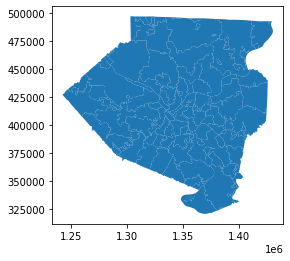

In [6]:
zipbounds = geopandas.read_file('Allegheny_County_Zip_Code_Boundaries.shp') # read in the shapefile
zipbounds.plot()

In [8]:
fips = pd.read_csv("County - Allegheny County - Pennsylvnia.csv")
fips.head()

,ZIP,CITY,COUNTY
0,15006,Bairdford,Allegheny
1,15007,Bakerstown,Allegheny
2,15014,Brackenridge,Allegheny
3,15015,Bradfordwoods,Allegheny
4,15017,Bridgeville,Allegheny


<BarContainer object of 100 artists>

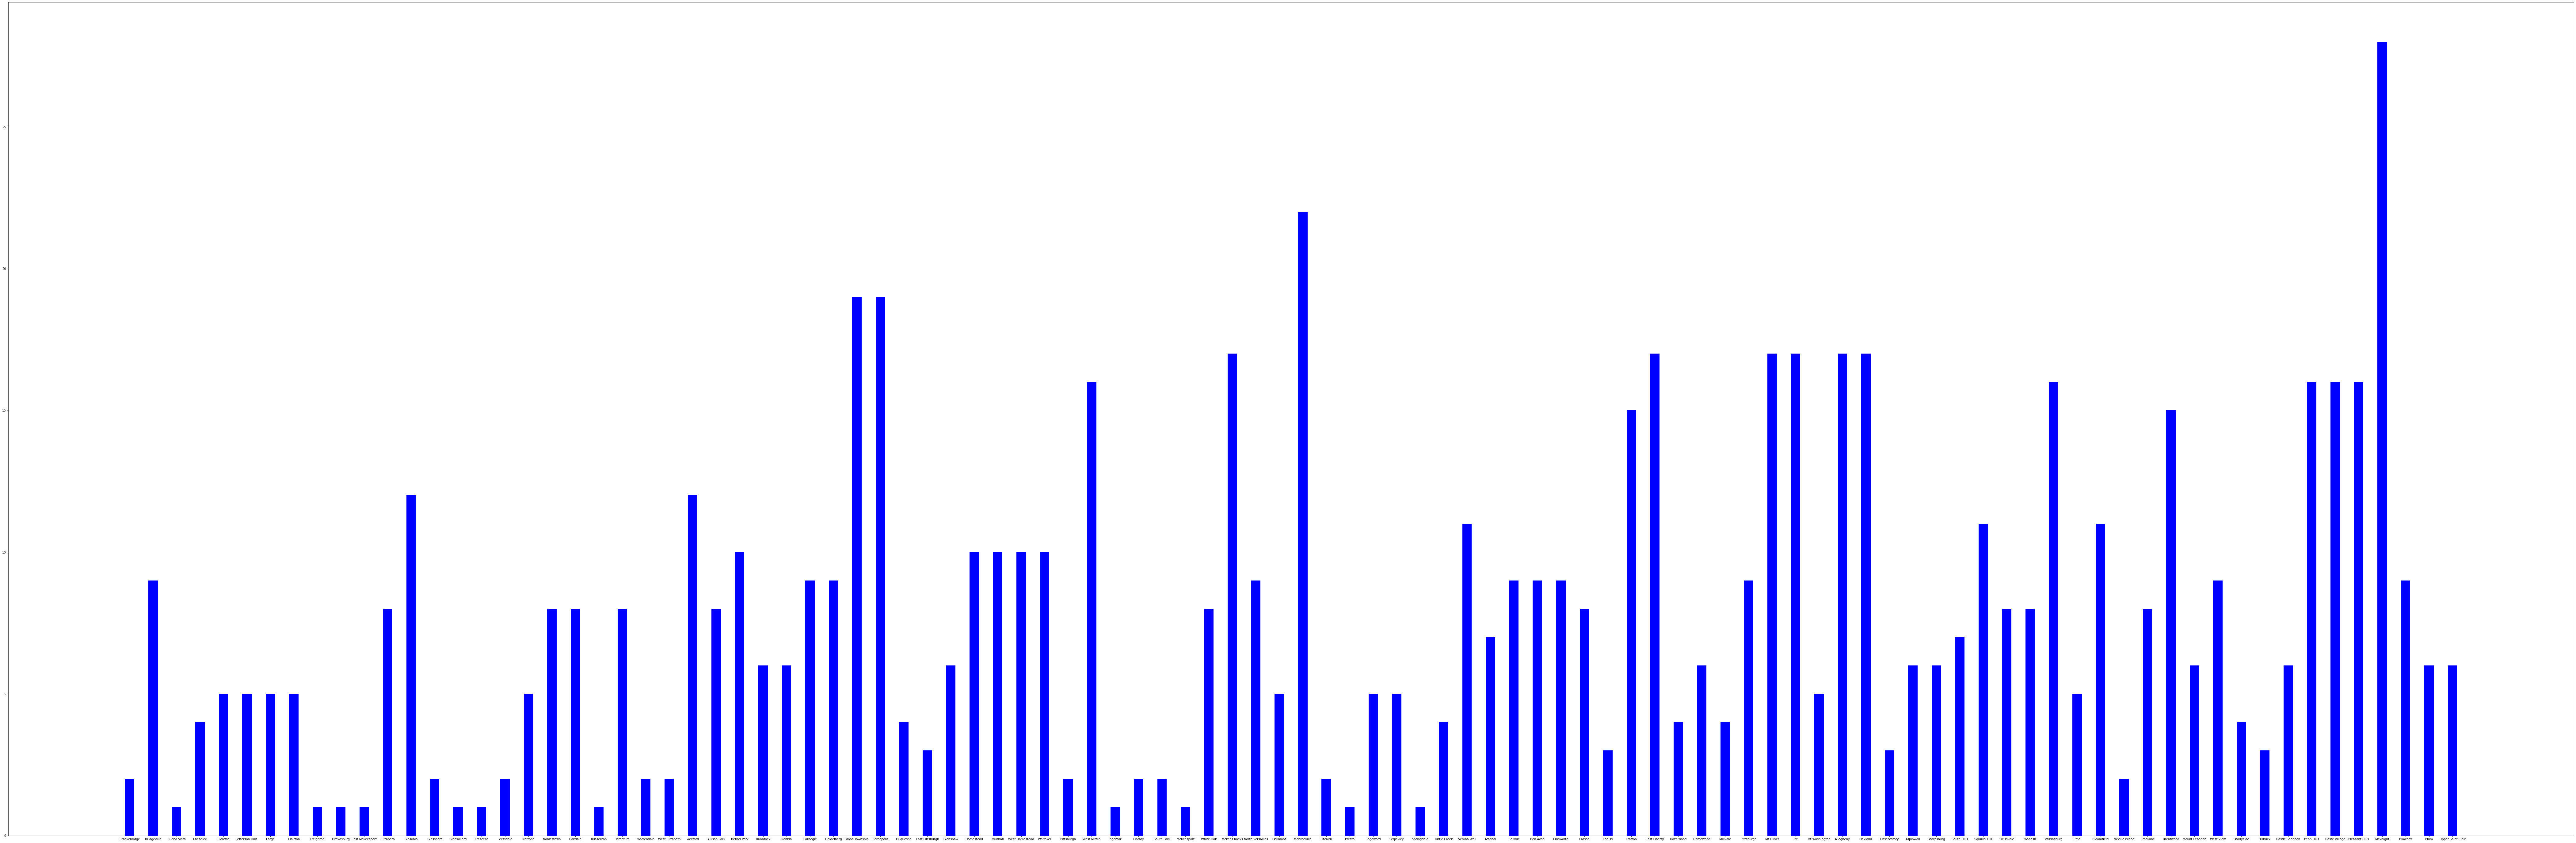

In [11]:
Dict2={}
Dict3={}
barchart={}
for index, row in fips.iterrows():
    zipcode2 = row['ZIP']
    city = row['CITY']
    Dict2[zipcode2]=city
    if zipcode2 in Dict:
        barchart[Dict2[zipcode2]]=Dict[zipcode2]
hoods = list(barchart.keys())
values = list(barchart.values())
fig = plt.figure(figsize = (150, 50))
 
# creating the bar plot
plt.bar(hoods, values, color ='blue',
        width = 0.4)

From the bar plot, we can see that the neighborhood of Mcknight has the greatest amount of convenience stores and supermarkets.

### Park Availability

I wanted to measure the best quality of life of a neighborhood by calculating each neighborhood's combined park area, and the best neighhorhood would be the one with the biggest combined park area, but my data did not contain the area for each park. My data did, however, contain which neighborhood the parks are located in, so I will be measuring the best quality of life of a neighborhood by calculating the number of parks in each neighborhood, and the neighborhood with the most parks is the best neighborhood.

<br>
Import pandas library to work with data sets

In [2]:
import pandas as pd

<br>
Load in the City of Pittsburgh Parks Data

In [4]:
data = pd.read_csv("parks.csv")

# look at the first ten rows of the data
data.head(10)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
8,2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846
9,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247


<br>
Delete unwanted data. Data will only contain park name, type, and neighborhood which the park is located in. 

In [6]:
data1 = data[['name', 'type', 'neighborhood']]
data1.head(20)

,name,type,neighborhood
0,Able Long Park,Park,Beechview
1,Albert Turk Graham Park,Park,Crawford-Roberts
2,Alcoa Park,Park,North Shore
3,Allegheny Commons,Park,Allegheny Center
4,Allegheny Landing Park,Park,North Shore
5,Allegheny Riverfront Park,Park,Central Business District
6,Alpine Gardens Park,Park,Central Northside
7,Alton Park,Park,Beechview
8,Amber Triangle,Traffic Island/Median,East Liberty
9,Ammon Park,Park,Bedford Dwellings


<br>
Data must only contain parks that have the type park.

In [8]:
parkData = data1.loc[data1['type'] == "Park"] 
parkData.head(20)

,name,type,neighborhood
0,Able Long Park,Park,Beechview
1,Albert Turk Graham Park,Park,Crawford-Roberts
2,Alcoa Park,Park,North Shore
3,Allegheny Commons,Park,Allegheny Center
4,Allegheny Landing Park,Park,North Shore
5,Allegheny Riverfront Park,Park,Central Business District
6,Alpine Gardens Park,Park,Central Northside
7,Alton Park,Park,Beechview
9,Ammon Park,Park,Bedford Dwellings
10,Arlington Park,Park,South Side Slopes


<br>
Make a new dataFrame with the first column being all the unique neighborhood names. Another associated column will be the occurances of the neighborhood name within the park data.

In [10]:
nbhd = parkData['neighborhood'].value_counts()
nbhd.head(10)

Beechview             6
South Side Slopes     6
Hazelwood             5
Troy Hill             5
Mount Washington      5
Elliott               4
East Liberty          4
Marshall-Shadeland    4
Sheraden              4
Carrick               3
Name: neighborhood, dtype: int64

<br>
Plot the data in a bar graph for better data visualization

Text(0, 0.5, 'Number of Parks')

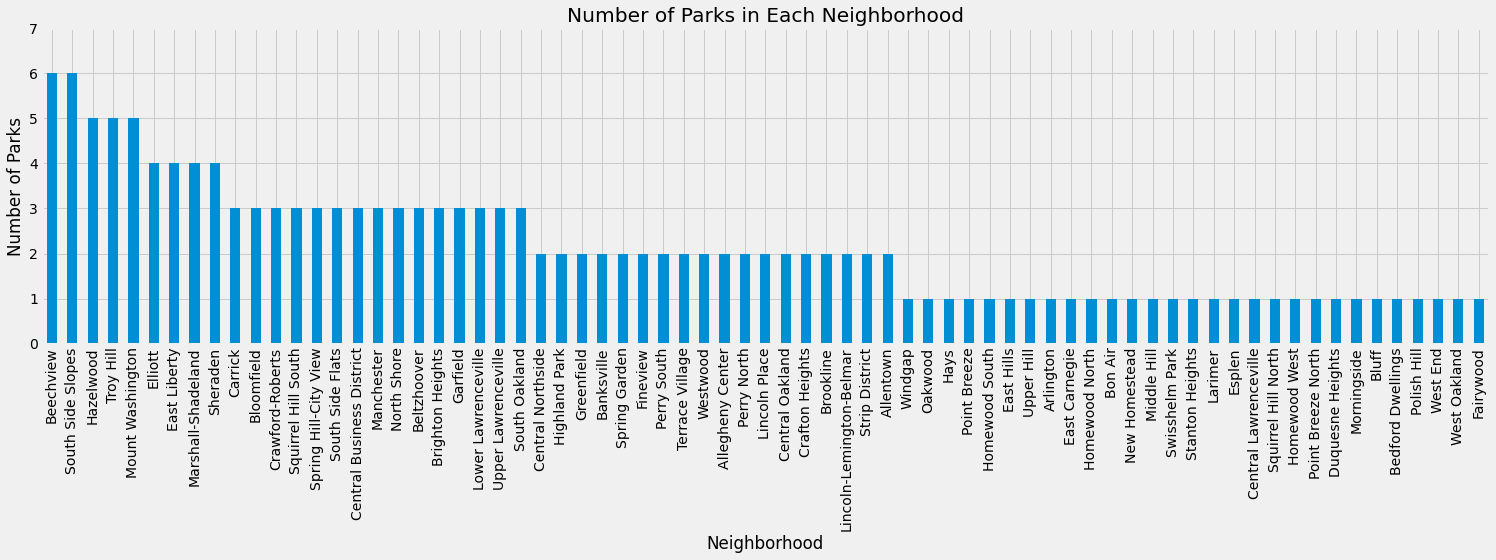

In [12]:
import matplotlib.pyplot as plt #import pyplot library for data visualization

# format and style
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [21, 8]
plt.rcParams["figure.autolayout"] = True

ax = nbhd.plot(kind='bar', linewidth=1, title = "Number of Parks in Each Neighborhood", ylim = [0, 7])

# set axis labels
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Number of Parks")


<br>
Zoom in on top ten neighborhoods for easier comparison

Text(0, 0.5, 'Number of Parks')

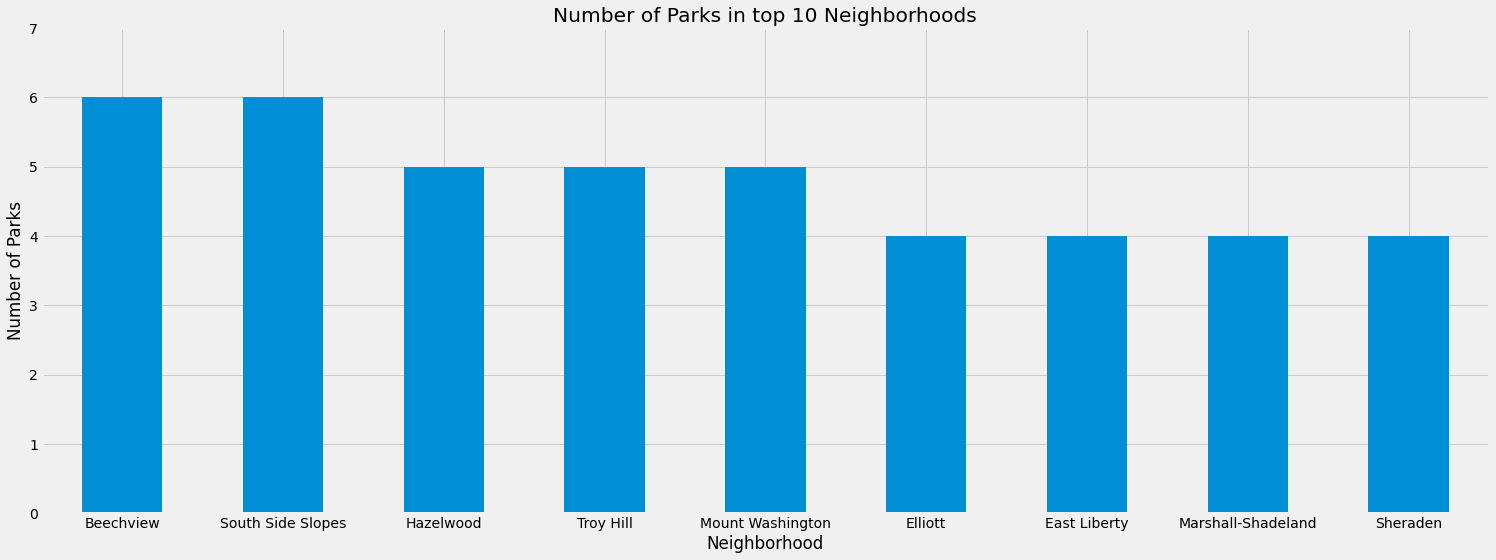

In [14]:
ax = nbhd.head(9).plot(kind='bar', linewidth=1, rot = 0, title = "Number of Parks in top 10 Neighborhoods", ylim = [0,7])
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Number of Parks")


## Conclusion

After analyzing the park data, I have come to a conclusion that South Side Slopes and Beechview are both the best neighborhoods in terms of quality of life. These two neighborhoods have six parks within them which is more than any other neighborhood in the data set. I can narrow this down even further by looking at the areas of South Side Slopes and Beechview. Out of the two, the neighborhood with the smaller area with be the best neighborhood because that means it takes people less time on average to travel to a park which is a better quality of life. South Side Slopes has an area of approximately 0.716 square miles, and Beechview has an area of approximately 1.460 square miles. South Side Slopes is the best neighborhoods in terms of quality of life.